# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataset and Creating Train/Test Split

In [ ]:
from utils import train_transforms,test_transforms
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 2

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data,**args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Shape of the train data
print (train_data.data.shape)
# Shape of the test data
print (test_data.data.shape)

# Number of categories in the data
print (len(train_data.classes))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
10


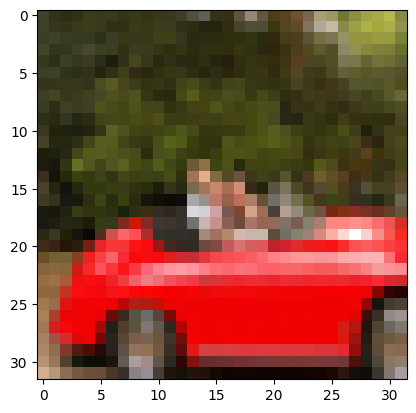

automobile


In [ ]:
# Visualizing an image from train data
import matplotlib.pyplot as plt
img = train_data.data[99]
label = train_data.targets[99]

plt.imshow(img)
plt.show()

for key, value in enumerate(train_data.class_to_idx):
  if key == label:
      print (value)

In [ ]:
# Model Summary
from model import Model_Norm
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_Norm(norm_type='bn').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
       BatchNorm2d-5           [-1, 16, 32, 32]              32
           Dropout-6           [-1, 16, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             128
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 24, 16, 16]           1,728
      BatchNorm2d-10           [-1, 24, 16, 16]              48
          Dropout-11           [-1, 24, 16, 16]               0
           Conv2d-12           [-1, 24, 16, 16]           5,184
      BatchNorm2d-13           [-1, 24, 16, 16]              48
          Dropout-14           [-1

In [ ]:
# Training And Testing

In [ ]:
from torch.optim.lr_scheduler import StepLR
from model import train,test
model =  Model_Norm(norm_type='bn').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.4963091611862183 Batch_id=390 Accuracy=40.73: 100%|██████████| 391/391 [00:48<00:00,  8.15it/s]



Test set: Average loss: 1.4332, Accuracy: 4656/10000 (46.56%)

EPOCH: 1


Loss=1.1864274740219116 Batch_id=390 Accuracy=54.04: 100%|██████████| 391/391 [00:48<00:00,  8.04it/s]



Test set: Average loss: 1.2507, Accuracy: 5531/10000 (55.31%)

EPOCH: 2


Loss=1.1808843612670898 Batch_id=390 Accuracy=58.74: 100%|██████████| 391/391 [00:48<00:00,  8.01it/s]



Test set: Average loss: 1.2000, Accuracy: 5745/10000 (57.45%)

EPOCH: 3


Loss=1.0164624452590942 Batch_id=390 Accuracy=61.37: 100%|██████████| 391/391 [00:47<00:00,  8.15it/s]



Test set: Average loss: 1.1868, Accuracy: 5804/10000 (58.04%)

EPOCH: 4


Loss=0.9304357767105103 Batch_id=390 Accuracy=62.95: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



Test set: Average loss: 1.0899, Accuracy: 6157/10000 (61.57%)

EPOCH: 5


Loss=0.7502392530441284 Batch_id=390 Accuracy=64.32: 100%|██████████| 391/391 [00:47<00:00,  8.17it/s]



Test set: Average loss: 1.0318, Accuracy: 6334/10000 (63.34%)

EPOCH: 6


Loss=0.9216248393058777 Batch_id=390 Accuracy=66.71: 100%|██████████| 391/391 [00:47<00:00,  8.24it/s]



Test set: Average loss: 0.9505, Accuracy: 6647/10000 (66.47%)

EPOCH: 7


Loss=0.9328038096427917 Batch_id=390 Accuracy=67.45: 100%|██████████| 391/391 [00:49<00:00,  7.90it/s]



Test set: Average loss: 0.9401, Accuracy: 6695/10000 (66.95%)

EPOCH: 8


Loss=1.0659611225128174 Batch_id=390 Accuracy=67.37: 100%|██████████| 391/391 [00:49<00:00,  7.97it/s]



Test set: Average loss: 0.9371, Accuracy: 6672/10000 (66.72%)

EPOCH: 9


Loss=1.0053205490112305 Batch_id=390 Accuracy=67.74: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



Test set: Average loss: 0.9214, Accuracy: 6742/10000 (67.42%)

EPOCH: 10


Loss=0.7395116090774536 Batch_id=390 Accuracy=68.12: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]



Test set: Average loss: 0.9167, Accuracy: 6769/10000 (67.69%)

EPOCH: 11


Loss=1.0133436918258667 Batch_id=390 Accuracy=67.88: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]



Test set: Average loss: 0.9260, Accuracy: 6705/10000 (67.05%)

EPOCH: 12


Loss=0.8111904859542847 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]



Test set: Average loss: 0.9171, Accuracy: 6747/10000 (67.47%)

EPOCH: 13


Loss=0.850753664970398 Batch_id=390 Accuracy=68.39: 100%|██████████| 391/391 [00:48<00:00,  8.07it/s]



Test set: Average loss: 0.9169, Accuracy: 6748/10000 (67.48%)

EPOCH: 14


Loss=0.9589301943778992 Batch_id=390 Accuracy=68.19: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]



Test set: Average loss: 0.9093, Accuracy: 6774/10000 (67.74%)

EPOCH: 15


Loss=0.8857674598693848 Batch_id=390 Accuracy=68.43: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]



Test set: Average loss: 0.9126, Accuracy: 6771/10000 (67.71%)

EPOCH: 16


Loss=0.7841126322746277 Batch_id=390 Accuracy=68.51: 100%|██████████| 391/391 [00:49<00:00,  7.88it/s]



Test set: Average loss: 0.9187, Accuracy: 6738/10000 (67.38%)

EPOCH: 17


Loss=0.8293883204460144 Batch_id=390 Accuracy=68.58: 100%|██████████| 391/391 [00:48<00:00,  8.02it/s]



Test set: Average loss: 0.9043, Accuracy: 6779/10000 (67.79%)

EPOCH: 18


Loss=0.739310622215271 Batch_id=390 Accuracy=68.39: 100%|██████████| 391/391 [00:48<00:00,  8.03it/s]



Test set: Average loss: 0.9122, Accuracy: 6752/10000 (67.52%)

EPOCH: 19


Loss=0.8891453742980957 Batch_id=390 Accuracy=68.59: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]



Test set: Average loss: 0.8995, Accuracy: 6789/10000 (67.89%)



In [ ]:

# Wrong predictions
cnt=0
import random
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)
img_lst=[]
cat_lst=[]
x_lst=[]
for i in range(0,127):
  x = random.randint(0,127)

  if pred[x].item()!=target[x].item():
    img=data[x].cpu().numpy().T
    img_lst.append(img)
    cat=[value for key,value in enumerate(train_data.class_to_idx) if key==target[x].item()][0]
    cat_lst.append(cat)
    x_lst.append(x)
    cnt+=1
  if cnt>9:
    break

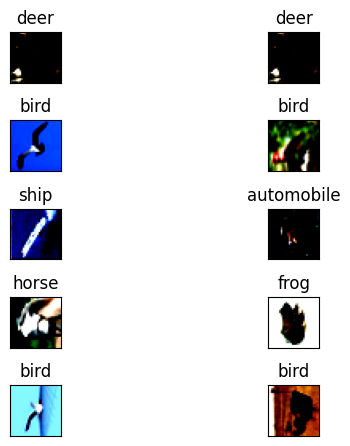

In [ ]:
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.tight_layout()
  plt.imshow(img_lst[i])
  plt.title(cat_lst[i])
  plt.xticks([])
  plt.yticks([])